In [9]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Sample parameters
num_jobs = 100
companies = ['ABC Corp', 'XYZ Ltd', 'GlobalTech', 'FinServ', 'Medicare']
locations = ['Dubai', 'Abu Dhabi', 'Sharjah', 'Ajman', 'Ras Al Khaimah']
departments = ['IT', 'Marketing', 'Sales', 'Finance', 'HR']
job_titles = ['Analyst', 'Manager', 'Developer', 'Executive', 'Specialist']

# Generate dataset
data = {
    'Job_ID': range(1, num_jobs + 1),
    'Job_Title': np.random.choice(job_titles, num_jobs),
    'Company': np.random.choice(companies, num_jobs),
    'Location': np.random.choice(locations, num_jobs),
    'Department': np.random.choice(departments, num_jobs),
    'Salary': np.random.randint(4000, 25000, num_jobs),
    'Posted_Date': pd.date_range(start='2025-01-01', periods=num_jobs, freq='D'),
    'Applications_Received': np.random.randint(0, 200, num_jobs),
    'Skills_Required': np.random.choice(['Python, SQL', 'Excel, Power BI', 'Marketing, Sales', 'Finance, Accounting', 'Java, Python'], num_jobs),
    'Status': np.random.choice(['Open', 'Closed'], num_jobs),
    'Experience_Required': np.random.randint(0, 10, num_jobs)
}

df = pd.DataFrame(data)

# Introduce anomalies
df.loc[np.random.choice(df.index, 5, replace=False), 'Salary'] = 0
df.loc[np.random.choice(df.index, 5, replace=False), 'Applications_Received'] = 0
df.loc[np.random.choice(df.index, 3, replace=False), 'Job_Title'] = np.nan

# Display the first 10 rows
df.head(10)


,Job_ID,Job_Title,Company,Location,Department,Salary,Posted_Date,Applications_Received,Skills_Required,Status,Experience_Required
0,1,Executive,FinServ,Abu Dhabi,HR,5679,2025-01-01,8,"Java, Python",Open,1
1,2,Specialist,ABC Corp,Sharjah,HR,7506,2025-01-02,198,"Java, Python",Closed,9
2,3,Developer,FinServ,Dubai,IT,17284,2025-01-03,0,"Java, Python",Open,2
3,4,Specialist,XYZ Ltd,Dubai,HR,11253,2025-01-04,127,"Marketing, Sales",Closed,2
4,5,Specialist,ABC Corp,Ajman,Sales,23128,2025-01-05,51,"Finance, Accounting",Closed,4
5,6,Manager,Medicare,Sharjah,Finance,13435,2025-01-06,82,"Java, Python",Closed,4
6,7,Developer,GlobalTech,Ras Al Khaimah,IT,0,2025-01-07,110,"Finance, Accounting",Closed,1
7,8,Developer,FinServ,Sharjah,Finance,17296,2025-01-08,143,"Marketing, Sales",Closed,9
8,9,Developer,GlobalTech,Ajman,HR,22525,2025-01-09,116,"Marketing, Sales",Open,5
9,10,NaN,GlobalTech,Ajman,HR,17245,2025-01-10,68,"Finance, Accounting",Open,4


In [11]:
df.to_csv('UAE_Job_Market_Data.csv', index=False)


In [13]:
# Basic info
df.info()

# Summary statistics for numerical columns
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Job_ID                 100 non-null    int64         
 1   Job_Title              97 non-null     object        
 2   Company                100 non-null    object        
 3   Location               100 non-null    object        
 4   Department             100 non-null    object        
 5   Salary                 100 non-null    int32         
 6   Posted_Date            100 non-null    datetime64[ns]
 7   Applications_Received  100 non-null    int32         
 8   Skills_Required        100 non-null    object        
 9   Status                 100 non-null    object        
 10  Experience_Required    100 non-null    int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(6)
memory usage: 7.6+ KB


Job_ID                   0
Job_Title                3
Company                  0
Location                 0
Department               0
Salary                   0
Posted_Date              0
Applications_Received    0
Skills_Required          0
Status                   0
Experience_Required      0
dtype: int64

In [15]:
# Fill missing Job_Title with "Unknown"
df['Job_Title'].fillna('Unknown', inplace=True)

# Fill missing numerical columns with 0 or mean
df['Salary'].fillna(0, inplace=True)
df['Applications_Received'].fillna(0, inplace=True)
df['Experience_Required'].fillna(0, inplace=True)

# Verify
df.isnull().sum()


C:\Users\USER\AppData\Local\Temp\ipykernel_17624\3554322518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Job_Title'].fillna('Unknown', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_17624\3554322518.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Job_ID                   0
Job_Title                0
Company                  0
Location                 0
Department               0
Salary                   0
Posted_Date              0
Applications_Received    0
Skills_Required          0
Status                   0
Experience_Required      0
dtype: int64

In [17]:
# Flag anomalies
df['Salary_Anomaly'] = df['Salary'] == 0
df['Low_Applications'] = df['Applications_Received'] == 0
df.head()


,Job_ID,Job_Title,Company,Location,Department,Salary,Posted_Date,Applications_Received,Skills_Required,Status,Experience_Required,Salary_Anomaly,Low_Applications
0,1,Executive,FinServ,Abu Dhabi,HR,5679,2025-01-01,8,"Java, Python",Open,1,False,False
1,2,Specialist,ABC Corp,Sharjah,HR,7506,2025-01-02,198,"Java, Python",Closed,9,False,False
2,3,Developer,FinServ,Dubai,IT,17284,2025-01-03,0,"Java, Python",Open,2,False,True
3,4,Specialist,XYZ Ltd,Dubai,HR,11253,2025-01-04,127,"Marketing, Sales",Closed,2,False,False
4,5,Specialist,ABC Corp,Ajman,Sales,23128,2025-01-05,51,"Finance, Accounting",Closed,4,False,False


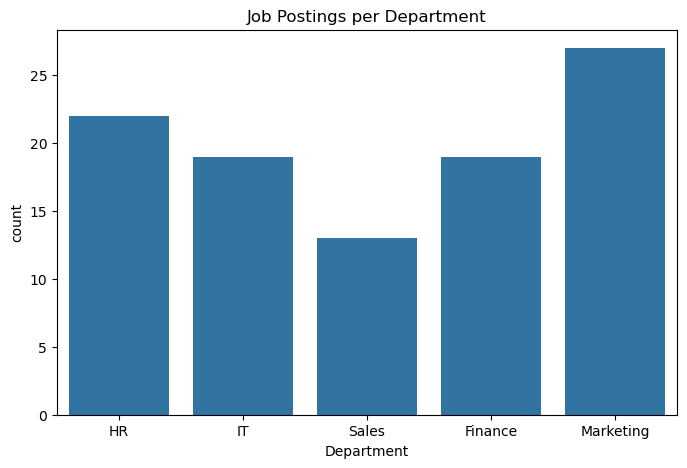

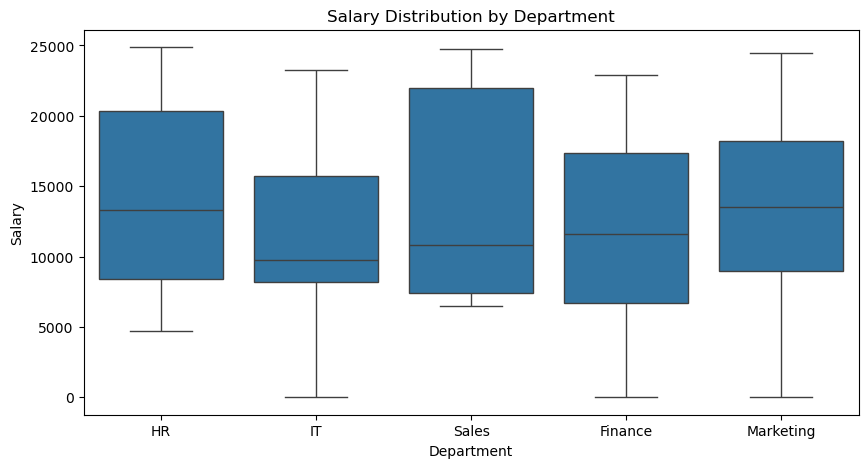

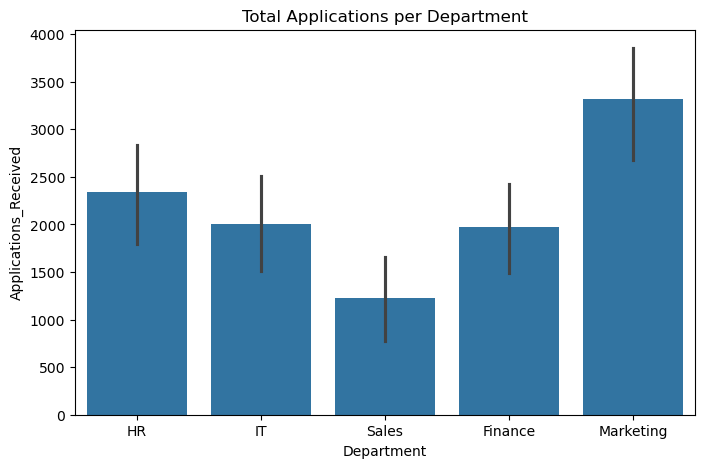

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Job postings per department
plt.figure(figsize=(8,5))
sns.countplot(x='Department', data=df)
plt.title('Job Postings per Department')
plt.show()

# Salary distribution by Department
plt.figure(figsize=(10,5))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.show()

# Applications received per department
plt.figure(figsize=(8,5))
sns.barplot(x='Department', y='Applications_Received', data=df, estimator=sum)
plt.title('Total Applications per Department')
plt.show()


In [20]:
# Applications per Experience
df['Applications_per_Experience'] = df['Applications_Received'] / (df['Experience_Required']+1)

# High-paying job flag
df['High_Paying'] = df['Salary'] > 20000

df.head()


,Job_ID,Job_Title,Company,Location,Department,Salary,Posted_Date,Applications_Received,Skills_Required,Status,Experience_Required,Salary_Anomaly,Low_Applications,Applications_per_Experience,High_Paying
0,1,Executive,FinServ,Abu Dhabi,HR,5679,2025-01-01,8,"Java, Python",Open,1,False,False,4.000000,False
1,2,Specialist,ABC Corp,Sharjah,HR,7506,2025-01-02,198,"Java, Python",Closed,9,False,False,19.800000,False
2,3,Developer,FinServ,Dubai,IT,17284,2025-01-03,0,"Java, Python",Open,2,False,True,0.000000,False
3,4,Specialist,XYZ Ltd,Dubai,HR,11253,2025-01-04,127,"Marketing, Sales",Closed,2,False,False,42.333333,False
4,5,Specialist,ABC Corp,Ajman,Sales,23128,2025-01-05,51,"Finance, Accounting",Closed,4,False,False,10.200000,True


In [21]:
# Jobs per location
df['Location'].value_counts()

# Average salary by department
df.groupby('Department')['Salary'].mean()

# Top skills in demand
skills = df['Skills_Required'].str.split(', ', expand=True).stack().value_counts()
skills


Python        51
Java          27
SQL           24
Finance       17
Accounting    17
Marketing     16
Sales         16
Excel         16
Power BI      16
Name: count, dtype: int64

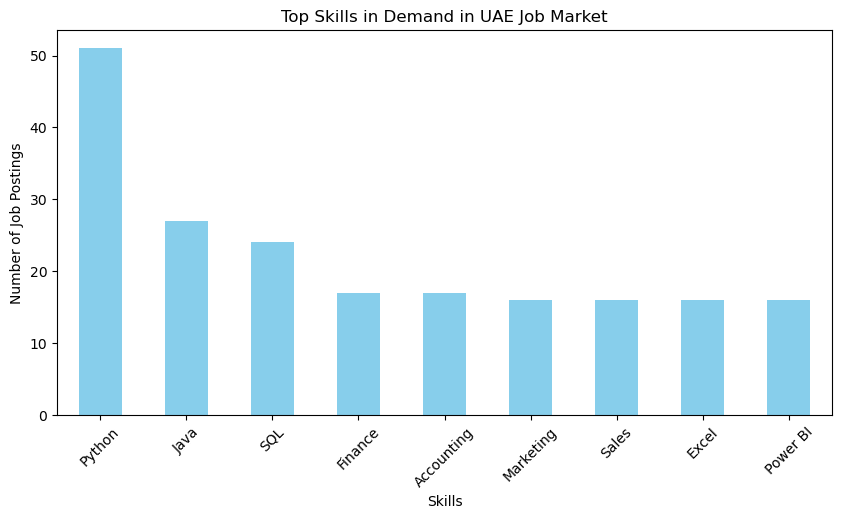

In [22]:
plt.figure(figsize=(10,5))
skills.plot(kind='bar', color='skyblue')
plt.title('Top Skills in Demand in UAE Job Market')
plt.ylabel('Number of Job Postings')
plt.xlabel('Skills')
plt.xticks(rotation=45)
plt.show()


In [23]:
# Example: average salary by skill
skill_list = ['Python', 'Java', 'SQL', 'Finance', 'Accounting', 'Marketing', 'Sales', 'Excel', 'Power BI']

avg_salary = {}
for skill in skill_list:
    avg_salary[skill] = df[df['Skills_Required'].str.contains(skill, na=False)]['Salary'].mean()

pd.Series(avg_salary).sort_values(ascending=False)


Marketing     16629.000000
Sales         16629.000000
Finance       13340.941176
Accounting    13340.941176
Java          12858.148148
Python        12836.078431
SQL           12811.250000
Excel         10064.375000
Power BI      10064.375000
dtype: float64

In [24]:
anomalies = df[(df['Salary'] == 0) | (df['Applications_Received'] == 0)]
anomalies[['Job_ID','Job_Title','Company','Salary','Applications_Received']]


,Job_ID,Job_Title,Company,Salary,Applications_Received
2,3,Developer,FinServ,17284,0
6,7,Developer,GlobalTech,0,110
15,16,Manager,Medicare,18069,0
43,44,Manager,FinServ,14636,0
51,52,Executive,ABC Corp,0,135
64,65,Manager,GlobalTech,0,107
71,72,Specialist,ABC Corp,0,125
75,76,Manager,XYZ Ltd,9104,0
83,84,Specialist,XYZ Ltd,18552,0
89,90,Developer,GlobalTech,0,152


In [25]:
df['Salary_Anomaly'] = df['Salary'] == 0
df['Applications_Anomaly'] = df['Applications_Received'] == 0

anomalies = df[df['Salary_Anomaly'] | df['Applications_Anomaly']]
anomalies[['Job_ID','Job_Title','Company','Salary','Applications_Received','Salary_Anomaly','Applications_Anomaly']]


,Job_ID,Job_Title,Company,Salary,Applications_Received,Salary_Anomaly,Applications_Anomaly
2,3,Developer,FinServ,17284,0,False,True
6,7,Developer,GlobalTech,0,110,True,False
15,16,Manager,Medicare,18069,0,False,True
43,44,Manager,FinServ,14636,0,False,True
51,52,Executive,ABC Corp,0,135,True,False
64,65,Manager,GlobalTech,0,107,True,False
71,72,Specialist,ABC Corp,0,125,True,False
75,76,Manager,XYZ Ltd,9104,0,False,True
83,84,Specialist,XYZ Ltd,18552,0,False,True
89,90,Developer,GlobalTech,0,152,True,False


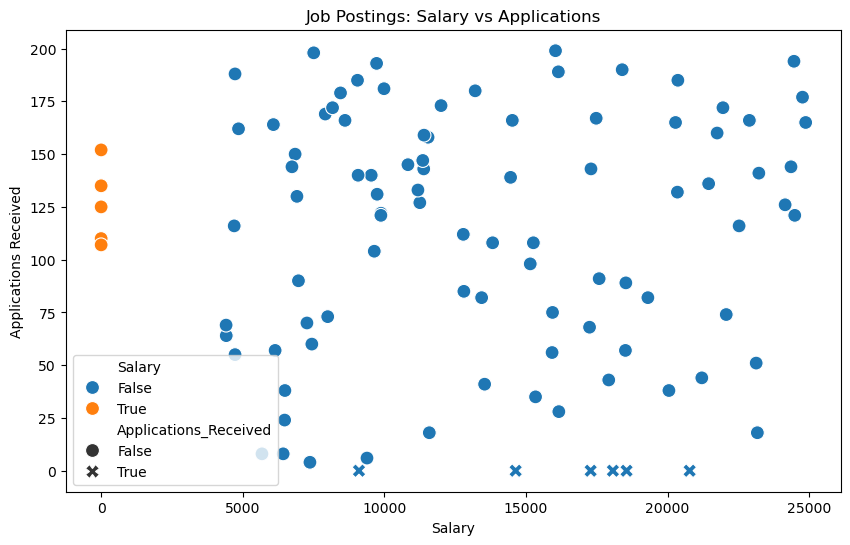

In [26]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Salary', y='Applications_Received', hue=df['Salary']==0, style=df['Applications_Received']==0, s=100)
plt.title('Job Postings: Salary vs Applications')
plt.xlabel('Salary')
plt.ylabel('Applications Received')
plt.show()


In [27]:
import pandas as pd

# Assuming your dataset is loaded in df
jobs_per_dept = df['Department'].value_counts()
print(jobs_per_dept)


Department
Marketing    27
HR           22
IT           19
Finance      19
Sales        13
Name: count, dtype: int64


In [31]:
avg_salary_per_dept = df.groupby('Department')['Salary'].mean()
print(avg_salary_per_dept)


Department
Finance      11688.736842
HR           14320.409091
IT           11650.894737
Marketing    13447.925926
Sales        14379.538462
Name: Salary, dtype: float64


In [36]:
applications_per_dept = df.groupby('Department')['Applications_Received'].sum()
print(applications_per_dept)


Department
Finance      1968
HR           2345
IT           2009
Marketing    3316
Sales        1231
Name: Applications_Received, dtype: int32


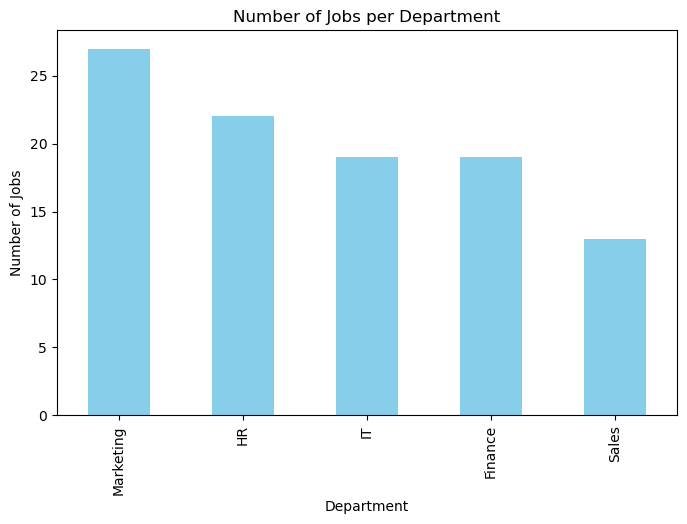

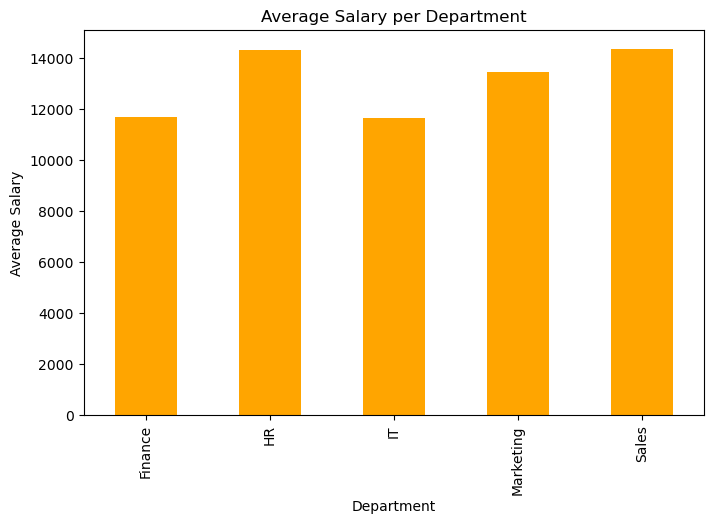

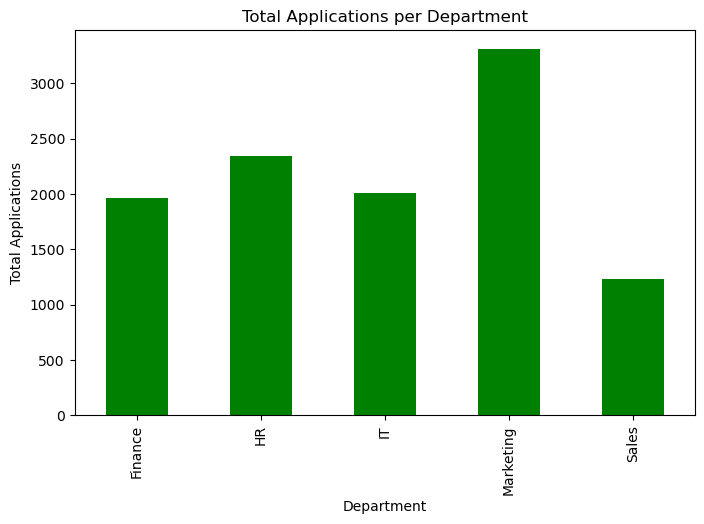

In [37]:
import matplotlib.pyplot as plt

# Jobs per department
plt.figure(figsize=(8,5))
jobs_per_dept.plot(kind='bar', color='skyblue')
plt.title('Number of Jobs per Department')
plt.xlabel('Department')
plt.ylabel('Number of Jobs')
plt.show()

# Average salary per department
plt.figure(figsize=(8,5))
avg_salary_per_dept.plot(kind='bar', color='orange')
plt.title('Average Salary per Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()

# Total applications per department
plt.figure(figsize=(8,5))
applications_per_dept.plot(kind='bar', color='green')
plt.title('Total Applications per Department')
plt.xlabel('Department')
plt.ylabel('Total Applications')
plt.show()


In [41]:
jobs_per_location = df['Location'].value_counts()
print(jobs_per_location)


Location
Sharjah           26
Dubai             26
Ajman             25
Ras Al Khaimah    12
Abu Dhabi         11
Name: count, dtype: int64


In [43]:
avg_salary_per_location = df.groupby('Location')['Salary'].mean()
print(avg_salary_per_location)


Location
Abu Dhabi         11763.181818
Ajman             12926.680000
Dubai             13634.423077
Ras Al Khaimah    13878.416667
Sharjah           12882.000000
Name: Salary, dtype: float64


In [44]:
applications_per_location = df.groupby('Location')['Applications_Received'].sum()
print(applications_per_location)


Location
Abu Dhabi         1198
Ajman             2803
Dubai             3123
Ras Al Khaimah    1110
Sharjah           2635
Name: Applications_Received, dtype: int32


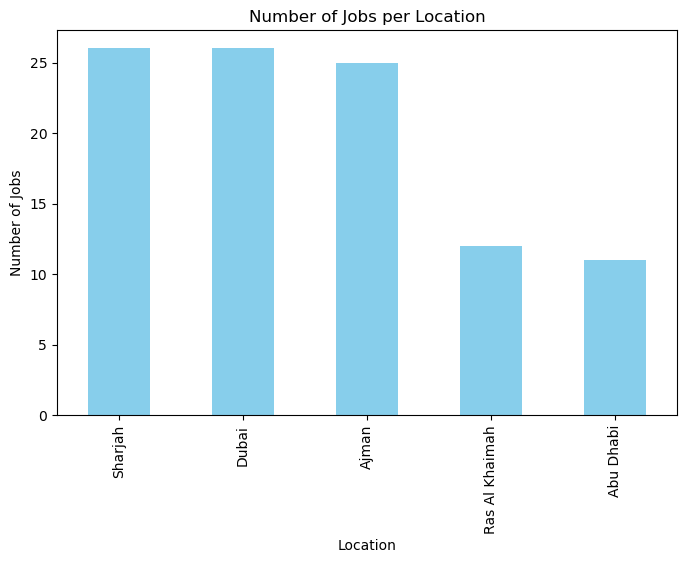

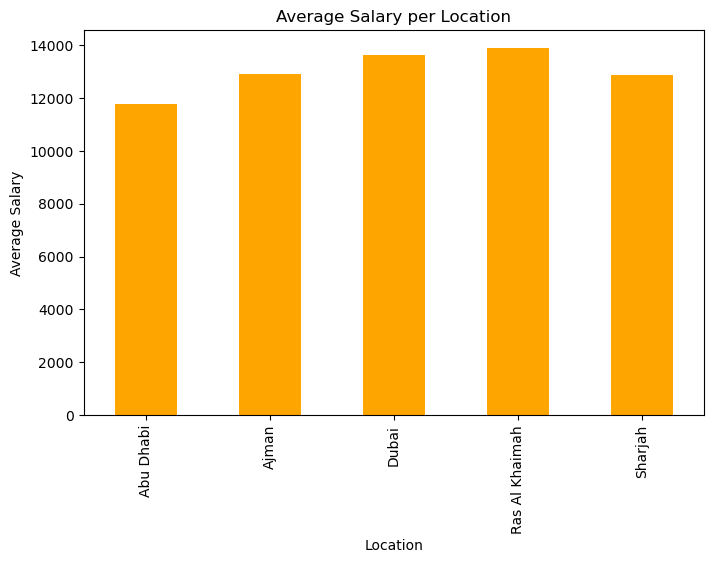

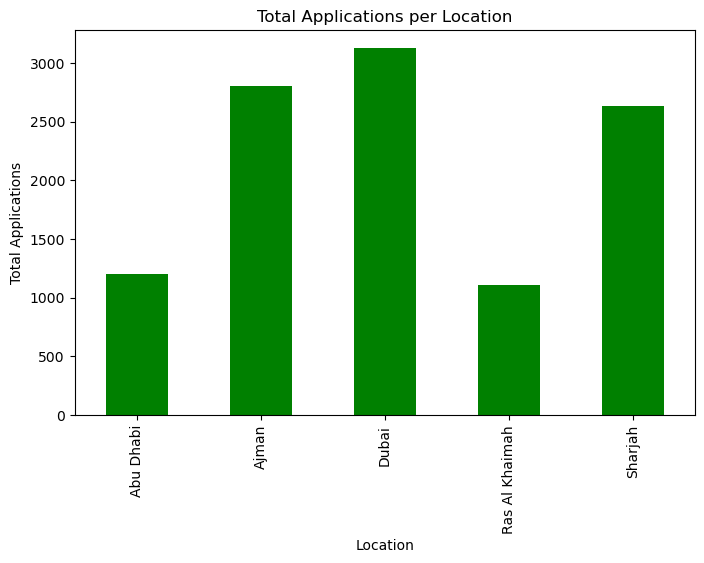

In [49]:
import matplotlib.pyplot as plt

# Jobs per location
plt.figure(figsize=(8,5))
jobs_per_location.plot(kind='bar', color='skyblue')
plt.title('Number of Jobs per Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.show()

# Average salary per location
plt.figure(figsize=(8,5))
avg_salary_per_location.plot(kind='bar', color='orange')
plt.title('Average Salary per Location')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.show()

# Total applications per location
plt.figure(figsize=(8,5))
applications_per_location.plot(kind='bar', color='green')
plt.title('Total Applications per Location')
plt.xlabel('Location')
plt.ylabel('Total Applications')
plt.show()


In [50]:
from collections import Counter

# Split skills and count
all_skills = df['Skills_Required'].dropna().apply(lambda x: x.split(', '))
skill_counts = Counter([skill for sublist in all_skills for skill in sublist])

# Convert to a DataFrame
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
print(skill_df)


        Skill  Count
1      Python     51
0        Java     27
6         SQL     24
4     Finance     17
5  Accounting     17
2   Marketing     16
3       Sales     16
7       Excel     16
8    Power BI     16


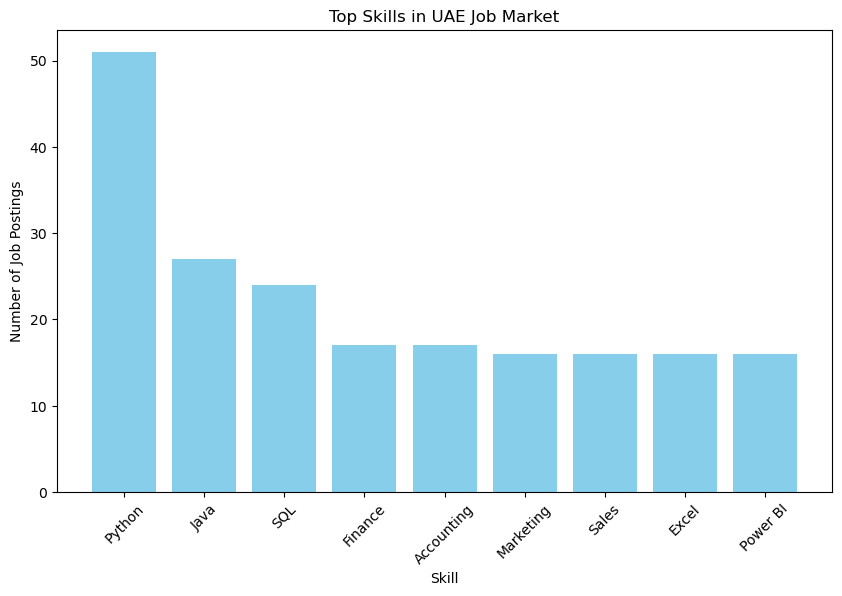

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(skill_df['Skill'], skill_df['Count'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top Skills in UAE Job Market')
plt.xlabel('Skill')
plt.ylabel('Number of Job Postings')
plt.show()


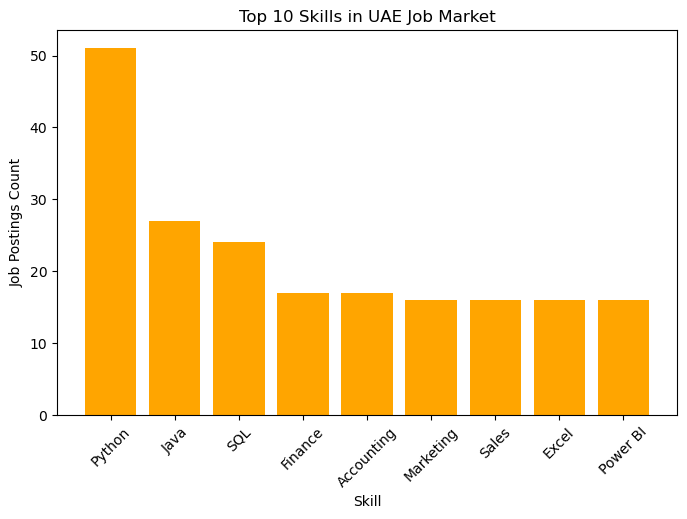

In [54]:
plt.figure(figsize=(8,5))
plt.bar(skill_df['Skill'][:10], skill_df['Count'][:10], color='orange')
plt.xticks(rotation=45)
plt.title('Top 10 Skills in UAE Job Market')
plt.xlabel('Skill')
plt.ylabel('Job Postings Count')
plt.show()


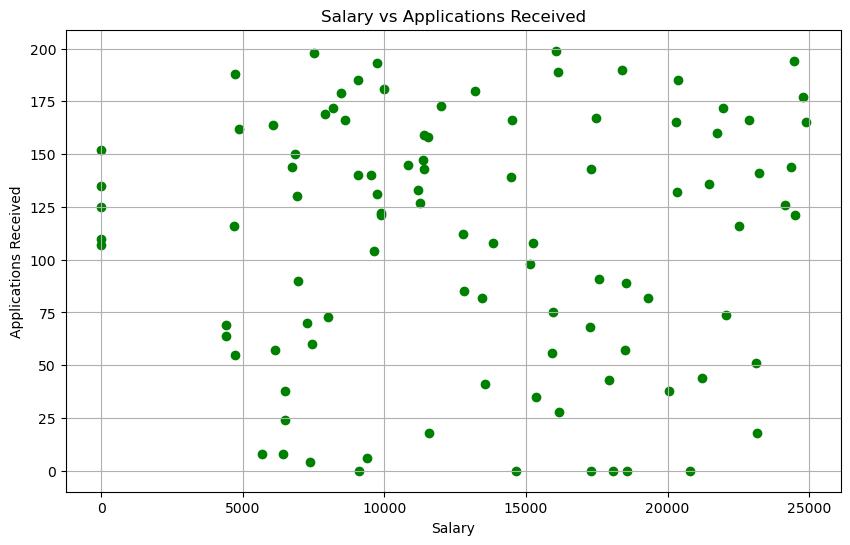

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Salary'], df['Applications_Received'], color='green')
plt.title('Salary vs Applications Received')
plt.xlabel('Salary')
plt.ylabel('Applications Received')
plt.grid(True)
plt.show()


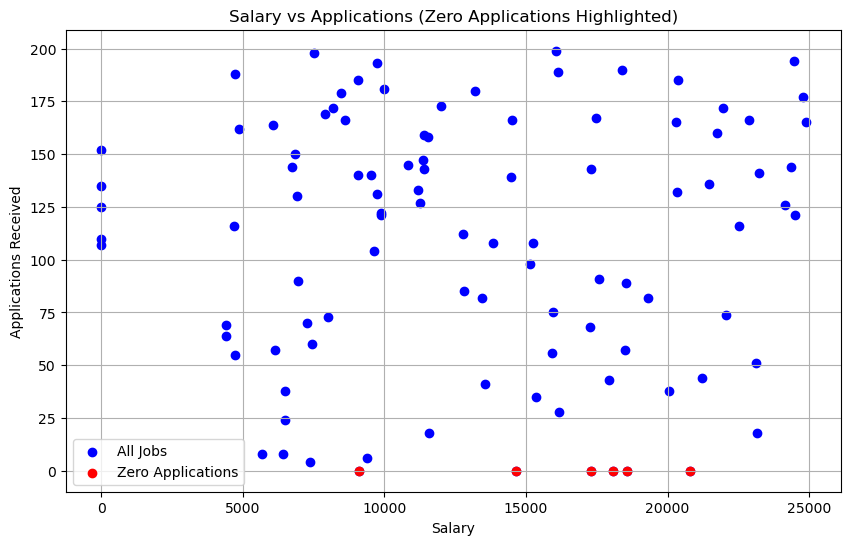

In [57]:
zero_apps = df[df['Applications_Received'] == 0]

plt.figure(figsize=(10,6))
plt.scatter(df['Salary'], df['Applications_Received'], color='blue', label='All Jobs')
plt.scatter(zero_apps['Salary'], zero_apps['Applications_Received'], color='red', label='Zero Applications')
plt.title('Salary vs Applications (Zero Applications Highlighted)')
plt.xlabel('Salary')
plt.ylabel('Applications Received')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
salary_bins = pd.cut(df['Salary'], bins=[0,5000,10000,15000,20000,25000])
bin_analysis = df.groupby(salary_bins)['Applications_Received'].mean()
print(bin_analysis)


Salary
(0, 5000]         109.000000
(5000, 10000]     107.566667
(10000, 15000]    117.555556
(15000, 20000]     85.900000
(20000, 25000]    120.238095
Name: Applications_Received, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_17624\291962091.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = df.groupby(salary_bins)['Applications_Received'].mean()


Department
Marketing    27
HR           22
IT           19
Finance      19
Sales        13
Name: count, dtype: int64


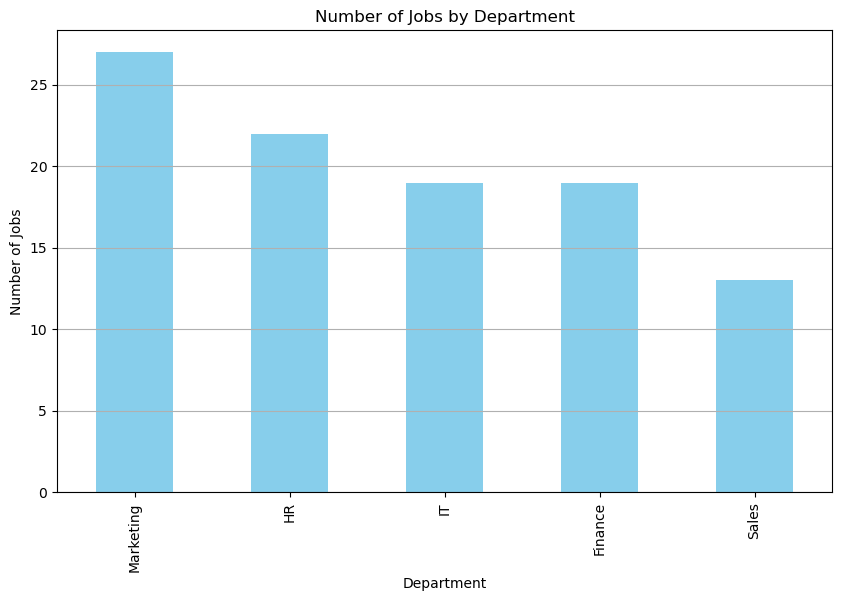

In [61]:
dept_counts = df['Department'].value_counts()
print(dept_counts)

# Bar plot
plt.figure(figsize=(10,6))
dept_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Jobs by Department')
plt.xlabel('Department')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()


Location
Sharjah           26
Dubai             26
Ajman             25
Ras Al Khaimah    12
Abu Dhabi         11
Name: count, dtype: int64


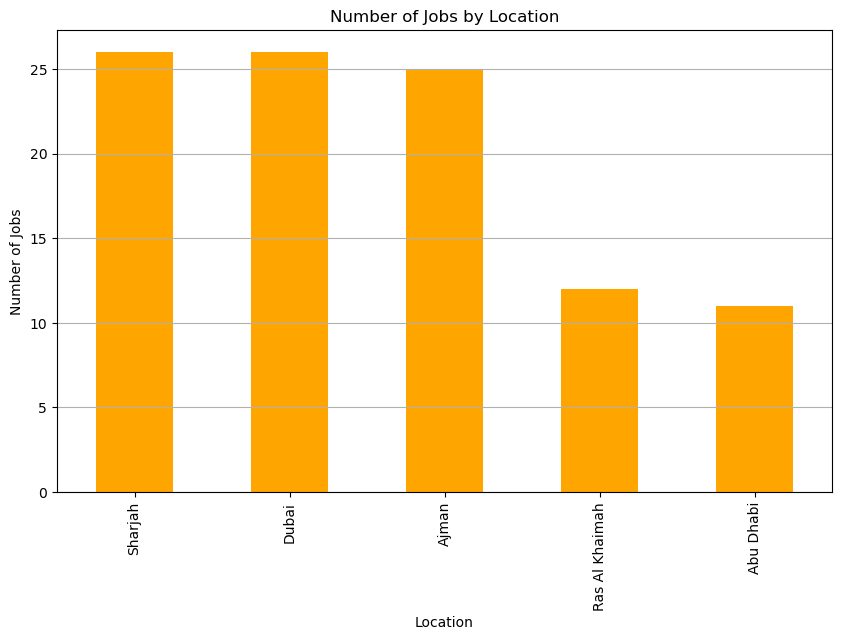

In [64]:
location_counts = df['Location'].value_counts()
print(location_counts)

# Bar plot
plt.figure(figsize=(10,6))
location_counts.plot(kind='bar', color='orange')
plt.title('Number of Jobs by Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()


Department
Marketing    3316
HR           2345
IT           2009
Finance      1968
Sales        1231
Name: Applications_Received, dtype: int32


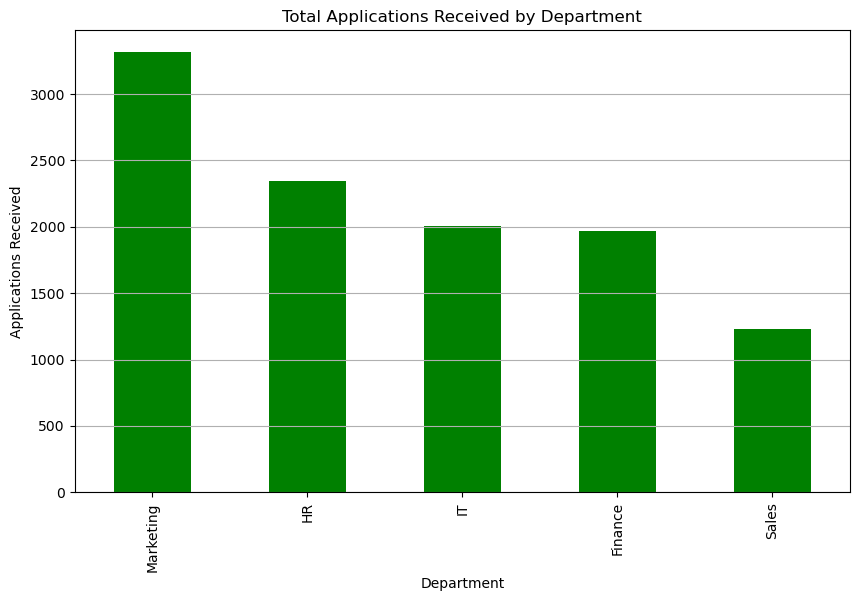

In [67]:
apps_by_dept = df.groupby('Department')['Applications_Received'].sum().sort_values(ascending=False)
print(apps_by_dept)

# Bar plot
plt.figure(figsize=(10,6))
apps_by_dept.plot(kind='bar', color='green')
plt.title('Total Applications Received by Department')
plt.xlabel('Department')
plt.ylabel('Applications Received')
plt.grid(axis='y')
plt.show()


Location
Dubai             3123
Ajman             2803
Sharjah           2635
Abu Dhabi         1198
Ras Al Khaimah    1110
Name: Applications_Received, dtype: int32


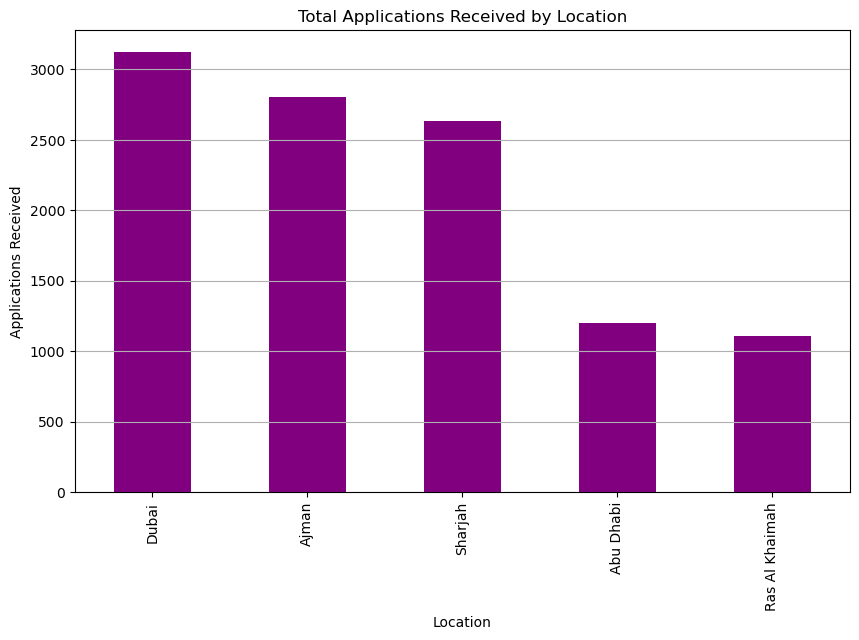

In [70]:
apps_by_location = df.groupby('Location')['Applications_Received'].sum().sort_values(ascending=False)
print(apps_by_location)

# Bar plot
plt.figure(figsize=(10,6))
apps_by_location.plot(kind='bar', color='purple')
plt.title('Total Applications Received by Location')
plt.xlabel('Location')
plt.ylabel('Applications Received')
plt.grid(axis='y')
plt.show()


    Job_ID   Job_Title     Company        Location Department  Salary  \
2        3   Developer     FinServ           Dubai         IT   17284   
6        7   Developer  GlobalTech  Ras Al Khaimah         IT       0   
15      16     Manager    Medicare         Sharjah  Marketing   18069   
43      44     Manager     FinServ         Sharjah    Finance   14636   
51      52   Executive    ABC Corp           Ajman  Marketing       0   
64      65     Manager  GlobalTech           Ajman    Finance       0   
71      72  Specialist    ABC Corp           Dubai    Finance       0   
75      76     Manager     XYZ Ltd         Sharjah      Sales    9104   
83      84  Specialist     XYZ Ltd           Ajman    Finance   18552   
89      90   Developer  GlobalTech           Ajman  Marketing       0   
97      98     Manager    ABC Corp         Sharjah      Sales   20779   

   Posted_Date  Applications_Received      Skills_Required  Status  \
2   2025-01-03                      0         Java, P

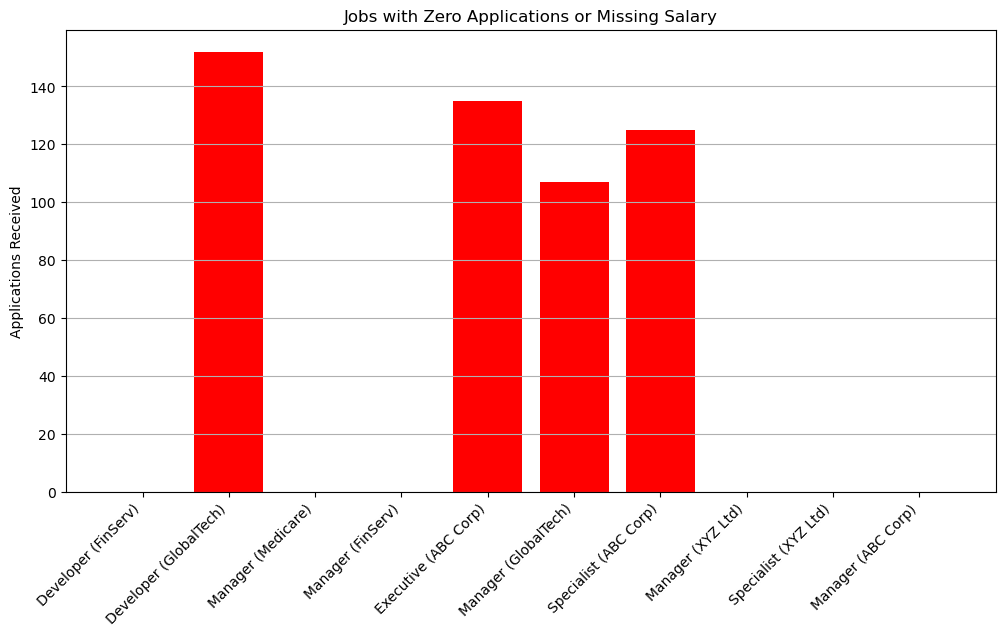

In [72]:
#  Identify jobs with zero applications or missing salaries
problem_jobs = df[(df['Applications_Received'] == 0) | (df['Salary'] == 0)]
print(problem_jobs)

# Optional: visualize the problematic jobs
plt.figure(figsize=(12,6))
plt.bar(problem_jobs['Job_Title'] + ' (' + problem_jobs['Company'] + ')', problem_jobs['Applications_Received'], color='red')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Applications Received')
plt.title('Jobs with Zero Applications or Missing Salary')
plt.grid(axis='y')
plt.show()


Skills_Required
Python        51
Java          27
SQL           24
Finance       17
Accounting    17
Marketing     16
Sales         16
Excel         16
Power BI      16
Name: count, dtype: int64


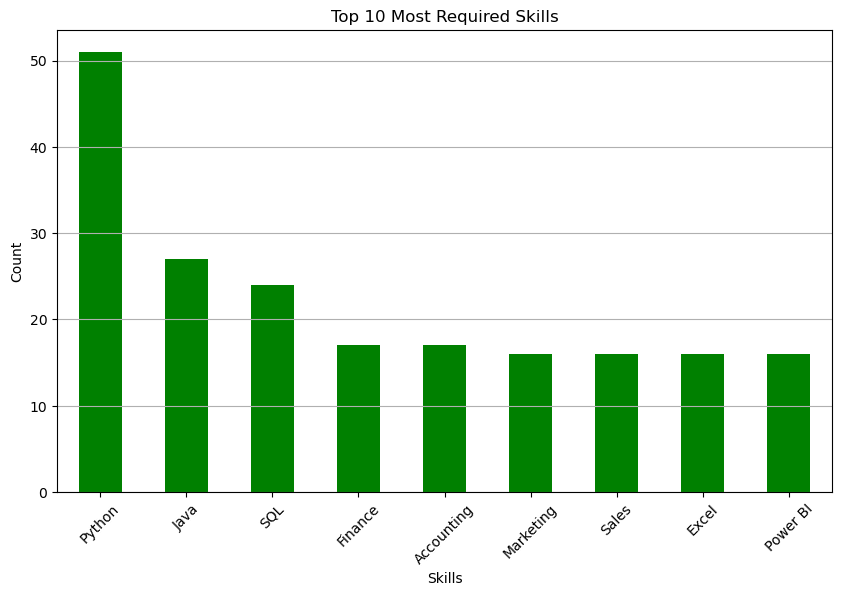

In [73]:
#  Skills Analysis
# Split skills by comma and flatten the list
skills_series = df['Skills_Required'].dropna().str.split(',').explode().str.strip()

# Count frequency of each skill
skills_count = skills_series.value_counts()

print(skills_count)

# Optional: visualize top 10 skills
plt.figure(figsize=(10,6))
skills_count.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Required Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Job Status Count:
 Status
Closed    52
Open      48
Name: count, dtype: int64

Experience Required Count:
 Experience_Required
0     9
1     8
2    11
3     7
4     9
5    12
6     9
7     9
8    12
9    14
Name: count, dtype: int64


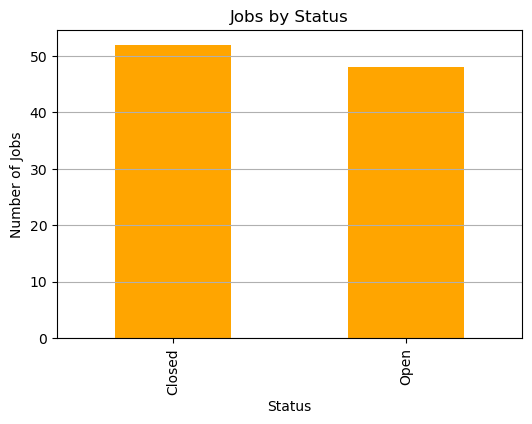

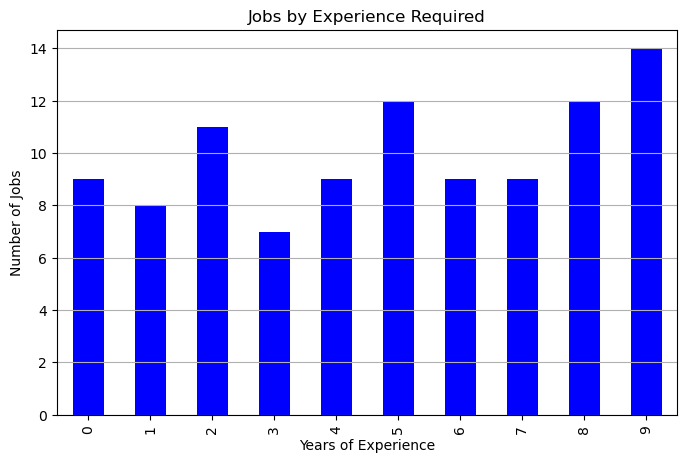

In [76]:
# Job Status & Experience Insights

# Count of jobs by Status
status_count = df['Status'].value_counts()
print("Job Status Count:\n", status_count)

# Count of jobs by Experience Required
experience_count = df['Experience_Required'].value_counts().sort_index()
print("\nExperience Required Count:\n", experience_count)

# Visualization: Job Status
plt.figure(figsize=(6,4))
status_count.plot(kind='bar', color='orange')
plt.title('Jobs by Status')
plt.xlabel('Status')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()

# Visualization: Experience Required
plt.figure(figsize=(8,5))
experience_count.plot(kind='bar', color='blue')
plt.title('Jobs by Experience Required')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()


In [77]:
# Fill missing skills with empty string
df['Skills_Required'] = df['Skills_Required'].fillna('')

# Split skills by comma and remove extra spaces
df['Skills_List'] = df['Skills_Required'].apply(lambda x: [skill.strip() for skill in x.split(',') if skill])


In [80]:
# Each skill becomes a separate row for easier counting
skills_exploded = df.explode('Skills_List')


In [82]:
# Group by Department and count each skill
skills_by_dept = skills_exploded.groupby('Department')['Skills_List'].value_counts()

# Display the counts
print("Skill Demand by Department:\n")
print(skills_by_dept)


Skill Demand by Department:

Department  Skills_List
Finance     Python          8
            Excel           5
            Power BI        5
            SQL             5
            Accounting      3
            Finance         3
            Java            3
            Marketing       3
            Sales           3
HR          Python         15
            Java           10
            SQL             5
            Marketing       4
            Sales           4
            Accounting      2
            Finance         2
            Excel           1
            Power BI        1
IT          Python         12
            Java            6
            SQL             6
            Accounting      3
            Excel           3
            Finance         3
            Power BI        3
            Marketing       1
            Sales           1
Marketing   Python         13
            SQL             7
            Accounting      6
            Finance         6
            Java 

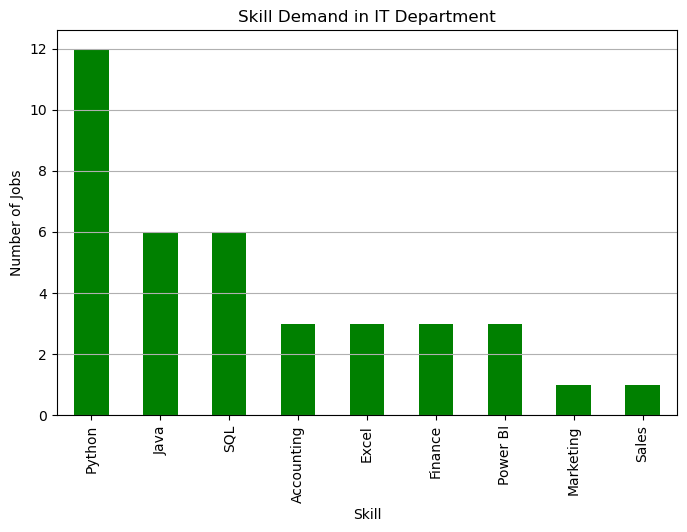

In [84]:
# Filter IT department skills
it_skills = skills_by_dept['IT']

# Bar plot
plt.figure(figsize=(8,5))
it_skills.plot(kind='bar', color='green')
plt.title('Skill Demand in IT Department')
plt.xlabel('Skill')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()


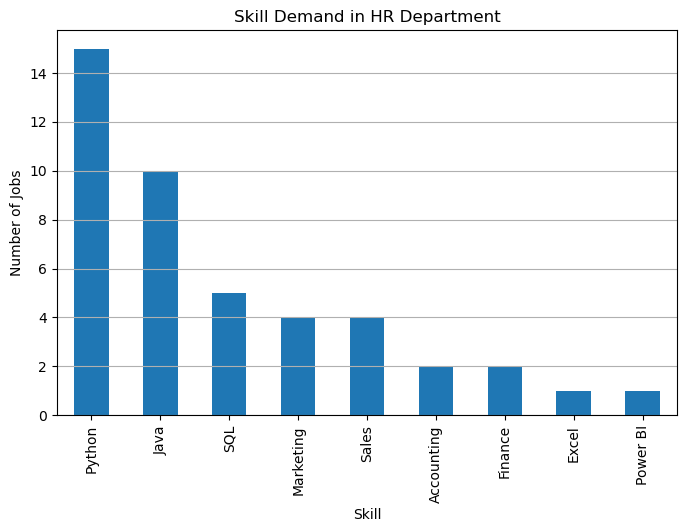

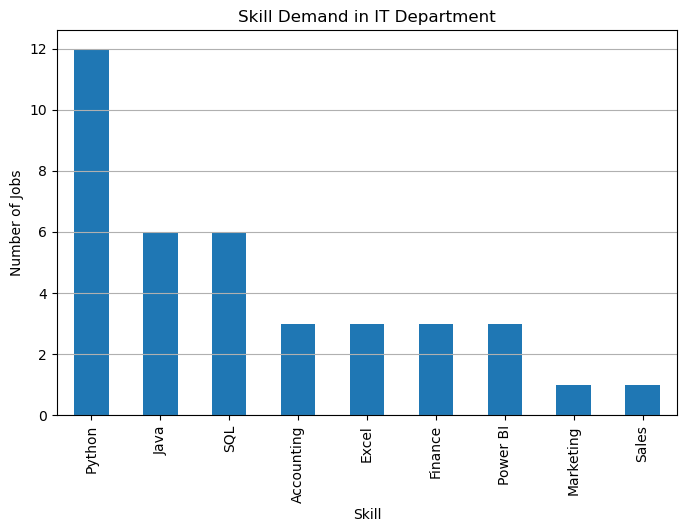

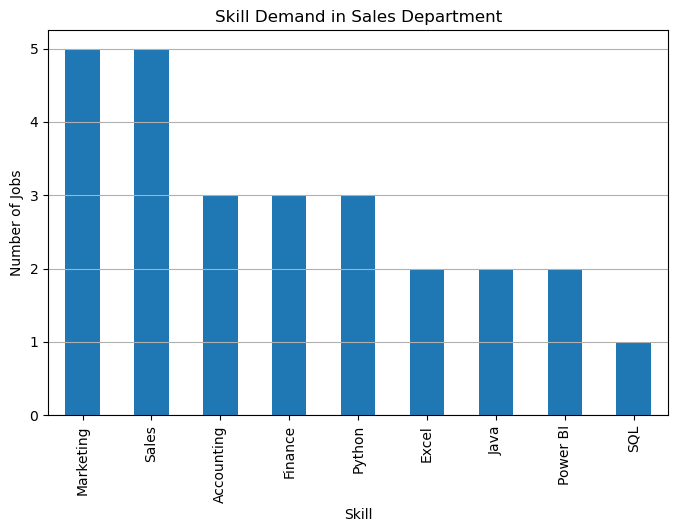

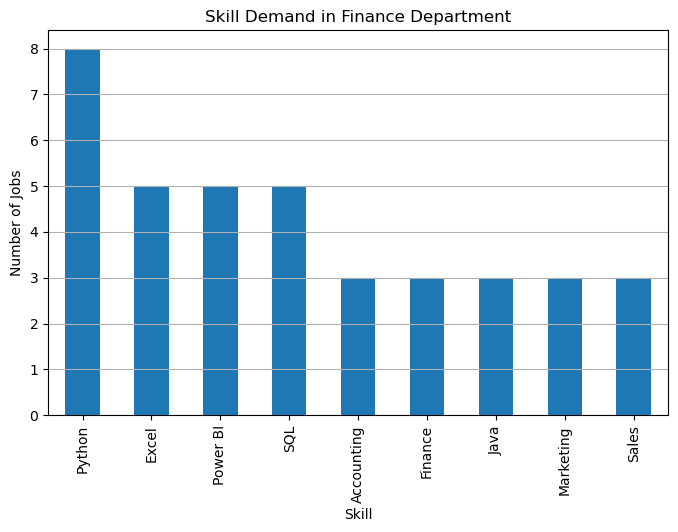

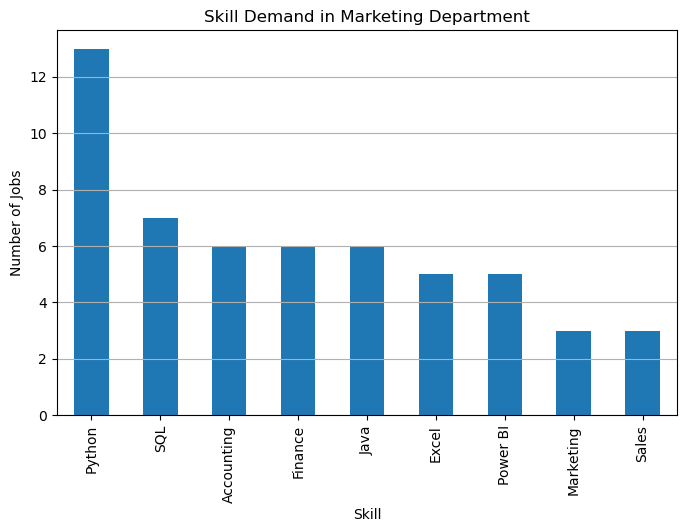

In [86]:
departments = df['Department'].unique()

for dept in departments:
    dept_skills = skills_by_dept[dept]
    plt.figure(figsize=(8,5))
    dept_skills.plot(kind='bar')
    plt.title(f'Skill Demand in {dept} Department')
    plt.xlabel('Skill')
    plt.ylabel('Number of Jobs')
    plt.grid(axis='y')
    plt.show()


In [87]:
# Optional: fill missing salaries or keep zeros if meaningful
df['Salary'] = df['Salary'].fillna(0)


In [88]:
# Group by department and calculate mean, min, max
salary_by_dept = df.groupby('Department')['Salary'].agg(['mean','min','max','count']).sort_values(by='mean', ascending=False)
print(salary_by_dept)


                    mean   min    max  count
Department                                  
Sales       14379.538462  6489  24764     13
HR          14320.409091  4728  24876     22
Marketing   13447.925926     0  24491     27
Finance     11688.736842     0  22888     19
IT          11650.894737     0  23223     19


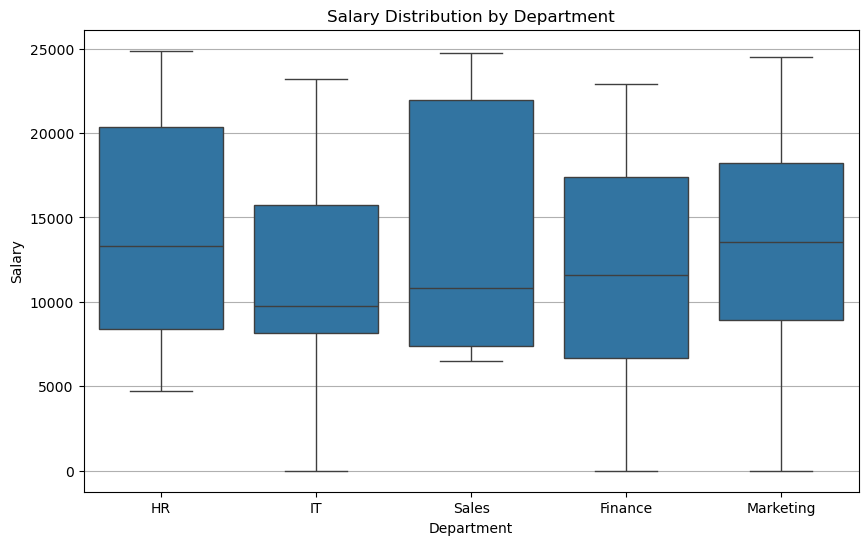

In [89]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.grid(axis='y')
plt.show()


In [93]:
# Outlier detection using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Salary'] < Q1 - 1.5*IQR) | (df['Salary'] > Q3 + 1.5*IQR)]
print("Salary Outliers:\n", outliers[['Job_ID','Department','Salary']])


Salary Outliers:
 Empty DataFrame
Columns: [Job_ID, Department, Salary]
Index: []


In [104]:
import sqlalchemy
import urllib

# Use your actual DataFrame here
df_to_upload = df  # replace 'df' with your cleaned DataFrame variable

# Connection details
server = 'LAPTOP-VFFVEKN4'
database = 'UAE_Job_Market'
driver = 'ODBC Driver 17 for SQL Server'

# URL-encode the driver
params = urllib.parse.quote_plus(f'DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes')

# Create SQLAlchemy engine
engine = sqlalchemy.create_engine(f'mssql+pyodbc:///?odbc_connect={params}')

# Upload DataFrame to SQL Server
df_to_upload.to_sql('Jobs', con=engine, if_exists='replace', index=False)
print("Data uploaded successfully!")


Data uploaded successfully!


In [106]:
import pandas as pd
import sqlalchemy

# Connection string (already defined)
engine = sqlalchemy.create_engine(connection_string)

# Read the table
df_sql = pd.read_sql("SELECT * FROM Jobs", engine)
print(df_sql.head())


InterfaceError: (pyodbc.InterfaceError) ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')
(Background on this error at: https://sqlalche.me/e/20/rvf5)

In [108]:
import sqlalchemy
import pandas as pd

# Database connection details
server = 'LAPTOP-VFFVEKN4'  # your machine name or SQL Server instance
database = 'UAE_Job_Market'

# Connection string for Windows Authentication
connection_string = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server;trusted_connection=yes"

# Create SQLAlchemy engine
engine = sqlalchemy.create_engine(connection_string)

# Example: Read the 'Jobs' table
try:
    df_sql = pd.read_sql("SELECT * FROM Jobs", engine)
    print("Data read successfully!")
    print(df_sql.head())
except Exception as e:
    print("Error reading data:", e)

# Example: Upload a DataFrame (replace 'df_to_upload' with your actual DataFrame)
# df_to_upload.to_sql('Jobs', con=engine, if_exists='replace', index=False)
# print("Data uploaded successfully!")


Error reading data: (pyodbc.Error) ('IM012', '[IM012] [Microsoft][ODBC Driver Manager] DRIVER keyword syntax error (0) (SQLDriverConnect)')
(Background on this error at: https://sqlalche.me/e/20/dbapi)


In [110]:
import sqlalchemy
import pandas as pd

# Database connection details
server = 'LAPTOP-VFFVEKN4'
database = 'UAE_Job_Market'

# Correct connection string format using curly braces for driver
connection_string = f"mssql+pyodbc://@{server}/{database}?driver={{ODBC Driver 17 for SQL Server}};trusted_connection=yes"

# Create SQLAlchemy engine
engine = sqlalchemy.create_engine(connection_string)

# Read table example
try:
    df_sql = pd.read_sql("SELECT * FROM Jobs", engine)
    print("Data read successfully!")
    print(df_sql.head())
except Exception as e:
    print("Error reading data:", e)


Error reading data: (pyodbc.Error) ('IM012', '[IM012] [Microsoft][ODBC Driver Manager] DRIVER keyword syntax error (0) (SQLDriverConnect)')
(Background on this error at: https://sqlalche.me/e/20/dbapi)


In [112]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine

# Connection details
server = 'LAPTOP-VFFVEKN4'
database = 'UAE_Job_Market'
driver = 'ODBC Driver 17 for SQL Server'  # Must match exactly what `pyodbc.drivers()` shows

# Create ODBC connection string
conn_str = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes'

# Test connection using pyodbc directly
try:
    cnxn = pyodbc.connect(conn_str)
    print("ODBC connection successful!")
except Exception as e:
    print("ODBC connection failed:", e)

# If the above works, create SQLAlchemy engine
engine = create_engine(f'mssql+pyodbc:///?odbc_connect={pyodbc.connect(conn_str).getinfo(pyodbc.SQL_DRIVER_NAME)}')

# Read table example
try:
    df_sql = pd.read_sql("SELECT * FROM Jobs", cnxn)
    print(df_sql.head())
except Exception as e:
    print("Error reading data:", e)


ODBC connection successful!
   Job_ID   Job_Title   Company   Location Department  Salary Posted_Date  \
0       1   Executive   FinServ  Abu Dhabi         HR    5679  2025-01-01   
1       2  Specialist  ABC Corp    Sharjah         HR    7506  2025-01-02   
2       3   Developer   FinServ      Dubai         IT   17284  2025-01-03   
3       4  Specialist   XYZ Ltd      Dubai         HR   11253  2025-01-04   
4       5  Specialist  ABC Corp      Ajman      Sales   23128  2025-01-05   

   Applications_Received      Skills_Required  Status  Experience_Required  \
0                      8         Java, Python    Open                    1   
1                    198         Java, Python  Closed                    9   
2                      0         Java, Python    Open                    2   
3                    127     Marketing, Sales  Closed                    2   
4                     51  Finance, Accounting  Closed                    4   

   Salary_Anomaly  Low_Applications  App

C:\Users\USER\AppData\Local\Temp\ipykernel_17624\3201609431.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql("SELECT * FROM Jobs", cnxn)


In [114]:
from sqlalchemy import create_engine
import urllib

params = urllib.parse.quote_plus(conn_str)  # your pyodbc connection string
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

df_sql = pd.read_sql("SELECT * FROM Jobs", engine)
print(df_sql.head())


   Job_ID   Job_Title   Company   Location Department  Salary Posted_Date  \
0       1   Executive   FinServ  Abu Dhabi         HR    5679  2025-01-01   
1       2  Specialist  ABC Corp    Sharjah         HR    7506  2025-01-02   
2       3   Developer   FinServ      Dubai         IT   17284  2025-01-03   
3       4  Specialist   XYZ Ltd      Dubai         HR   11253  2025-01-04   
4       5  Specialist  ABC Corp      Ajman      Sales   23128  2025-01-05   

   Applications_Received      Skills_Required  Status  Experience_Required  \
0                      8         Java, Python    Open                    1   
1                    198         Java, Python  Closed                    9   
2                      0         Java, Python    Open                    2   
3                    127     Marketing, Sales  Closed                    2   
4                     51  Finance, Accounting  Closed                    4   

   Salary_Anomaly  Low_Applications  Applications_per_Experience  Hi

In [116]:
# Basic info
print(df_sql.info())
print(df_sql.describe())

# Check for missing values
print(df_sql.isnull().sum())

# Fill missing numeric columns with 0 or median
df_sql['Salary'] = df_sql['Salary'].fillna(df_sql['Salary'].median())
df_sql['Applications_Received'] = df_sql['Applications_Received'].fillna(0)

# Fill missing categorical columns with empty string
df_sql['Skills_Required'] = df_sql['Skills_Required'].fillna('')
df_sql['Status'] = df_sql['Status'].fillna('Unknown')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Job_ID                       100 non-null    int64         
 1   Job_Title                    100 non-null    object        
 2   Company                      100 non-null    object        
 3   Location                     100 non-null    object        
 4   Department                   100 non-null    object        
 5   Salary                       100 non-null    int64         
 6   Posted_Date                  100 non-null    datetime64[ns]
 7   Applications_Received        100 non-null    int64         
 8   Skills_Required              100 non-null    object        
 9   Status                       100 non-null    object        
 10  Experience_Required          100 non-null    int64         
 11  Salary_Anomaly               100 non-null    b

In [118]:
df_sql['Skills_List'] = df_sql['Skills_Required'].apply(lambda x: [skill.strip() for skill in x.split(',')] if x else [])


In [120]:
df_sql['Posted_Date'] = pd.to_datetime(df_sql['Posted_Date'])


In [122]:
df_sql['Applications_per_Experience'] = df_sql['Applications_Received'] / df_sql['Experience_Required']


In [124]:
salary_threshold = df_sql['Salary'].quantile(0.75)
df_sql['High_Paying'] = df_sql['Salary'] > salary_threshold


In [126]:
apps_threshold = df_sql['Applications_Received'].quantile(0.10)
df_sql['Low_Applications'] = df_sql['Applications_Received'] < apps_threshold


In [128]:
df_sql['Salary_Anomaly'] = df_sql['Salary'] > df_sql['Salary'].mean() + 2*df_sql['Salary'].std()


In [130]:
open_jobs = df_sql[df_sql['Status']=='Open']
print(open_jobs.groupby('Department')['Job_ID'].count())


Department
Finance       5
HR            9
IT           10
Marketing    16
Sales         8
Name: Job_ID, dtype: int64


In [132]:
print(df_sql.sort_values(by='Salary', ascending=False).head())


    Job_ID   Job_Title   Company Location Department  Salary Posted_Date  \
92      93   Developer   FinServ    Dubai         HR   24876  2025-04-03   
42      43   Executive   FinServ    Dubai      Sales   24764  2025-02-12   
44      45     Manager   FinServ  Sharjah  Marketing   24491  2025-02-14   
72      73  Specialist   XYZ Ltd    Dubai  Marketing   24463  2025-03-14   
55      56     Analyst  ABC Corp  Sharjah      Sales   24358  2025-02-25   

    Applications_Received   Skills_Required  Status  Experience_Required  \
92                    165  Marketing, Sales  Closed                    6   
42                    177      Java, Python    Open                    2   
44                    121      Java, Python    Open                    1   
72                    194       Python, SQL  Closed                    7   
55                    144  Marketing, Sales    Open                    0   

    Salary_Anomaly  Low_Applications  Applications_per_Experience  \
92           Fals

In [134]:
urgent_jobs = df_sql[(df_sql['High_Paying']) & (df_sql['Low_Applications'])]
print(urgent_jobs)


    Job_ID   Job_Title   Company Location Department  Salary Posted_Date  \
83      84  Specialist   XYZ Ltd    Ajman    Finance   18552  2025-03-25   
97      98     Manager  ABC Corp  Sharjah      Sales   20779  2025-04-08   

    Applications_Received Skills_Required Status  Experience_Required  \
83                      0    Java, Python   Open                    5   
97                      0     Python, SQL   Open                    6   

    Salary_Anomaly  Low_Applications  Applications_per_Experience  \
83           False              True                          0.0   
97           False              True                          0.0   

    High_Paying  Applications_Anomaly     Skills_List  
83         True                  True  [Java, Python]  
97         True                  True   [Python, SQL]  


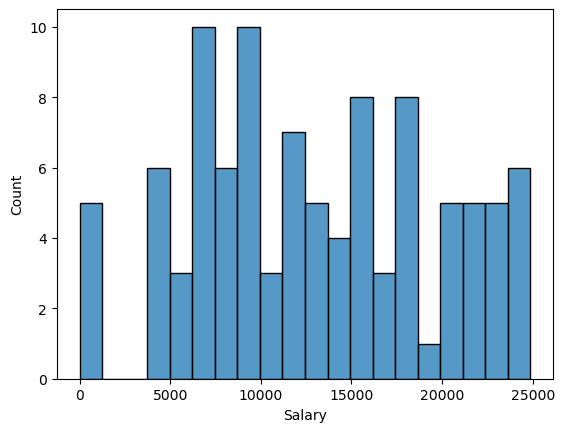

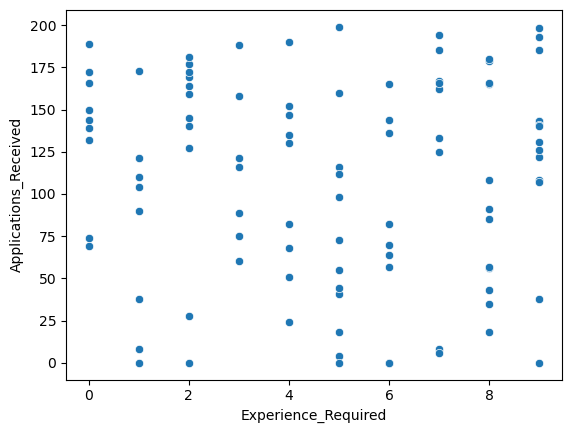

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution
sns.histplot(df_sql['Salary'], bins=20)
plt.show()

# Applications vs Experience
sns.scatterplot(x='Experience_Required', y='Applications_Received', data=df_sql)
plt.show()


In [138]:
for idx, row in df_sql.iterrows():
    update_query = f"""
    UPDATE Jobs
    SET High_Paying = {int(row['High_Paying'])}, Low_Applications = {int(row['Low_Applications'])}, Salary_Anomaly = {int(row['Salary_Anomaly'])}
    WHERE Job_ID = {row['Job_ID']}
    """
    cnxn.execute(update_query)
cnxn.commit()
